## **FLIGHT PRICE PREDICTION**

In [1]:
##Import the necessary libraries to use the dataset
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
##importing the dataset
data=pd.read_excel("Data_Train.xlsx")
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [3]:
data.info()
print("-"*100)
print()
print("Name of the columns are:-",data.columns)
print("-"*100)
print()
print("The no. of record present in the dataset are:-",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
----------------------------------------------------------------------------------------------------

Name of the columns are:- Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_

In [4]:
##checking the null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Observation:

     From the above observation we get to know that there are no Nan value present in the dataset. Except in the Column  name "Route" and in the "Total_stop" with a very less number.
    
    
What to do now:

      I will try to take a variable with "feature_with_nan" and put the Nan value in it and after that i will find the percentage of Nan value in to its specifics columns. So, that we can uderstand what to do with the Nan Value.

In [5]:
feature_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()]
feature_with_nan

['Route', 'Total_Stops']

In [6]:
for feature in feature_with_nan:
    print(feature,np.round(data[feature].isnull().mean(),4),"% missing value.")

Route 0.0001 % missing value.
Total_Stops 0.0001 % missing value.


observation:

               we get to know that there is a very less    percentage of Nan value presentin the missing columns.Route has only 0.0001% of missing value. and Total_stops has also only 0.0001% of missing value.
               
What to do now:

                as there are very less number of missing value or i can say that only 1 records of two coulmns have missing value. So i am replacing the missing value with median but without doing any type of visulaziation.

In [7]:
data.fillna(data[feature].isnull().median(),inplace=True)

In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## **Handling Temporal Variable**

### **1.Date of Journey to (Day and Month of journey)**

In [9]:
## Extracting Date from the Date of journey:
data['Day_of_Journey']=pd.to_datetime(data['Date_of_Journey'],format="%d/%m/%Y").dt.day

# Extracting Month from the Date of journey:
data["Month_of_Journey"]=pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [10]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Day_of_Journey  Month_of_Journey  
0              24                 3  
1               1                 5  
2               9                 6  
3              12                 5  
4               1                 3

In [11]:
##Since we have converted Date of journey columns ito integer so we can drop the column Date of journey
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
data.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  Day_of_Journey  \
0  01:10 22 Mar   2h 50m    non-stop         No info   3897              24   
1         13:15   7h 25m     2 stops         No info   7662               1   
2  04:25 10 Jun      19h     2 stops         No info  13882               9   
3         23:30   5h 25m      1 stop         No info   6218              12   
4         21:35   4h 45m      1 stop         No info  13302               1   

   Month_of_Journey  
0                 3  
1                 5  
2                 6  
3                 5  
4                 3

### 2.Dep_Time to (Hours and minute of Dep)

In [13]:
#Extracting the Hours and min from the Dep_Timeabs

#Hours
data["Dep_hours"]=pd.to_datetime(data["Dep_Time"]).dt.hour

#minute
data["Dep_minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute

#dropping the Dep_Time column
data.drop(['Dep_Time'],axis=1,inplace=True)

### 3. Arrival_Timing to (Arrival_hours and Arrival_minute)

In [14]:
# Extracting the Arrival Hours and Minute from the Arrival Timming
# Arrival hours:
data["Arrival_hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour 

# Arrival minute:
data["Arrival_minute"]=pd.to_datetime(data["Arrival_Time"]).dt.minute 

#now there is a no use of the columns "Arrival_Time" so we will drop it:
data.drop(["Arrival_Time"],axis=1,inplace=True)

In [15]:
data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Day_of_Journey  Month_of_Journey  \
0    non-stop         No info   3897              24                 3   
1     2 stops         No info   7662               1                 5   
2     2 stops         No info  13882               9                 6   
3      1 stop         No info   6218              12                 5   
4      1 stop         No info  13302               1                 3   

   Dep_hours  Dep_minute  Arrival_hour  Arrival_minute  
0         22          20             1              10  
1          5          50            13              15  
2          9          25             4              25  
3         18           5            23              30  
4         16          50            21              35

### 4.Duration to (Duration_hour and Duration_minutes)

In [16]:
## Time taken by the plane to reach the destination is called duration
##it is the difference between depature time and arrival time


##convert the duration columns into list because we have to split it
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!= 2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+' 0m'
        elif 'm' in duration[i]:
            duration[i]='0h {}'.format(duration[i].strip())
            
            
            
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))
    
data['Duration_hours']=duration_hours
data['Duration_minutes']=duration_minutes

##now we will drop the "Duration" columns as it has of no use
data.drop(['Duration'],axis=1,inplace=True)
    



In [17]:
data

Airline    Source Destination                  Route Total_Stops  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   
...            ...       ...         ...                    ...         ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    non-stop   
10679    Air India   Kolkata    Banglore              CCU → BLR    non-stop   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    non-stop   
10681      Vistara  Banglore   New Delhi              BLR → DEL    non-stop   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK     2 stops   

      Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0             No info   3897              24                 3         22   
1             No info   7662               1                 5          5   
2             No info  13882               9                 6          9   
3             No info   6218              12                 5         18   
4             No info  13302               1                 3         16   
...               ...    ...             ...               ...        ...   
10678         No info   4107               9                 4         19   
10679         No info   4145              27                 4         20   
10680         No info   7229              27                 4          8   
10681         No info  12648               1                 3         11   
10682         No info  11753               9                 5         10   

       Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  \
0              20             1              10               2   
1              50            13              15               7   
2              25             4              25              19   
3               5            23              30               5   
4              50            21              35               4   
...           ...           ...             ...             ...   
10678          55            22              25               2   
10679          45            23              20               2   
10680          20            11              20               3   
10681          30            14              10               2   
10682          55            19              15               8   

       Duration_minutes  
0                    50  
1                    25  
2                     0  
3                    25  
4                    45  
...                 ...  
10678                30  
10679                35  
10680                 0  
10681                40  
10682                20  

[10683 rows x 15 columns]

Observation of Temporal Variable:

        1)  In Date of journey i have split it into a Day and Month of Journey and drop the "Date of Jou
    rney" columns.
        2)  In Dep_Time i have split it into hours and mintues so we can easliy determine the time spen
    d.
        3)  In Arrival Time we can uderstand easily by Arrival_hours and arrival_minute.
        4)  Duration is the difference between Departure time and Arrival time

In [18]:
## thus the new data will look like
data.head(3)

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0         No info   3897              24                 3         22   
1         No info   7662               1                 5          5   
2         No info  13882               9                 6          9   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duration_minutes  
0          20             1              10               2                50  
1          50            13              15               7                25  
2          25             4              25              19                 0

## Handling The Categorical Features:

Type of Categorical feature are:--

1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [19]:
categorical_features=[feature for feature in data.columns if data[feature].dtype == "O"]
categorical_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Nominal Categorical data are:
   1. Airline
   2. Source
   3. Destination
   
Ordinal Ctegorical data are:
   1. Route
   2. Total_Stop
   3. 


In [20]:
## importing all the necessary libraries for data visualization and EDA:

import seaborn as sns
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import cufflinks as cf
cf.go_offline()

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


## 1. Airline

In [21]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [22]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#### observation:
    
         from the above observation we can see that Jet Airways had been most of the time.

In [23]:
data.iplot(kind='bar',x='Airline',y='Price',xTitle='Airlines Name',yTitle='Price of the Airlines',title='Airline VS Price ')

### Observation :

     . Jet Airways has the maxium price.


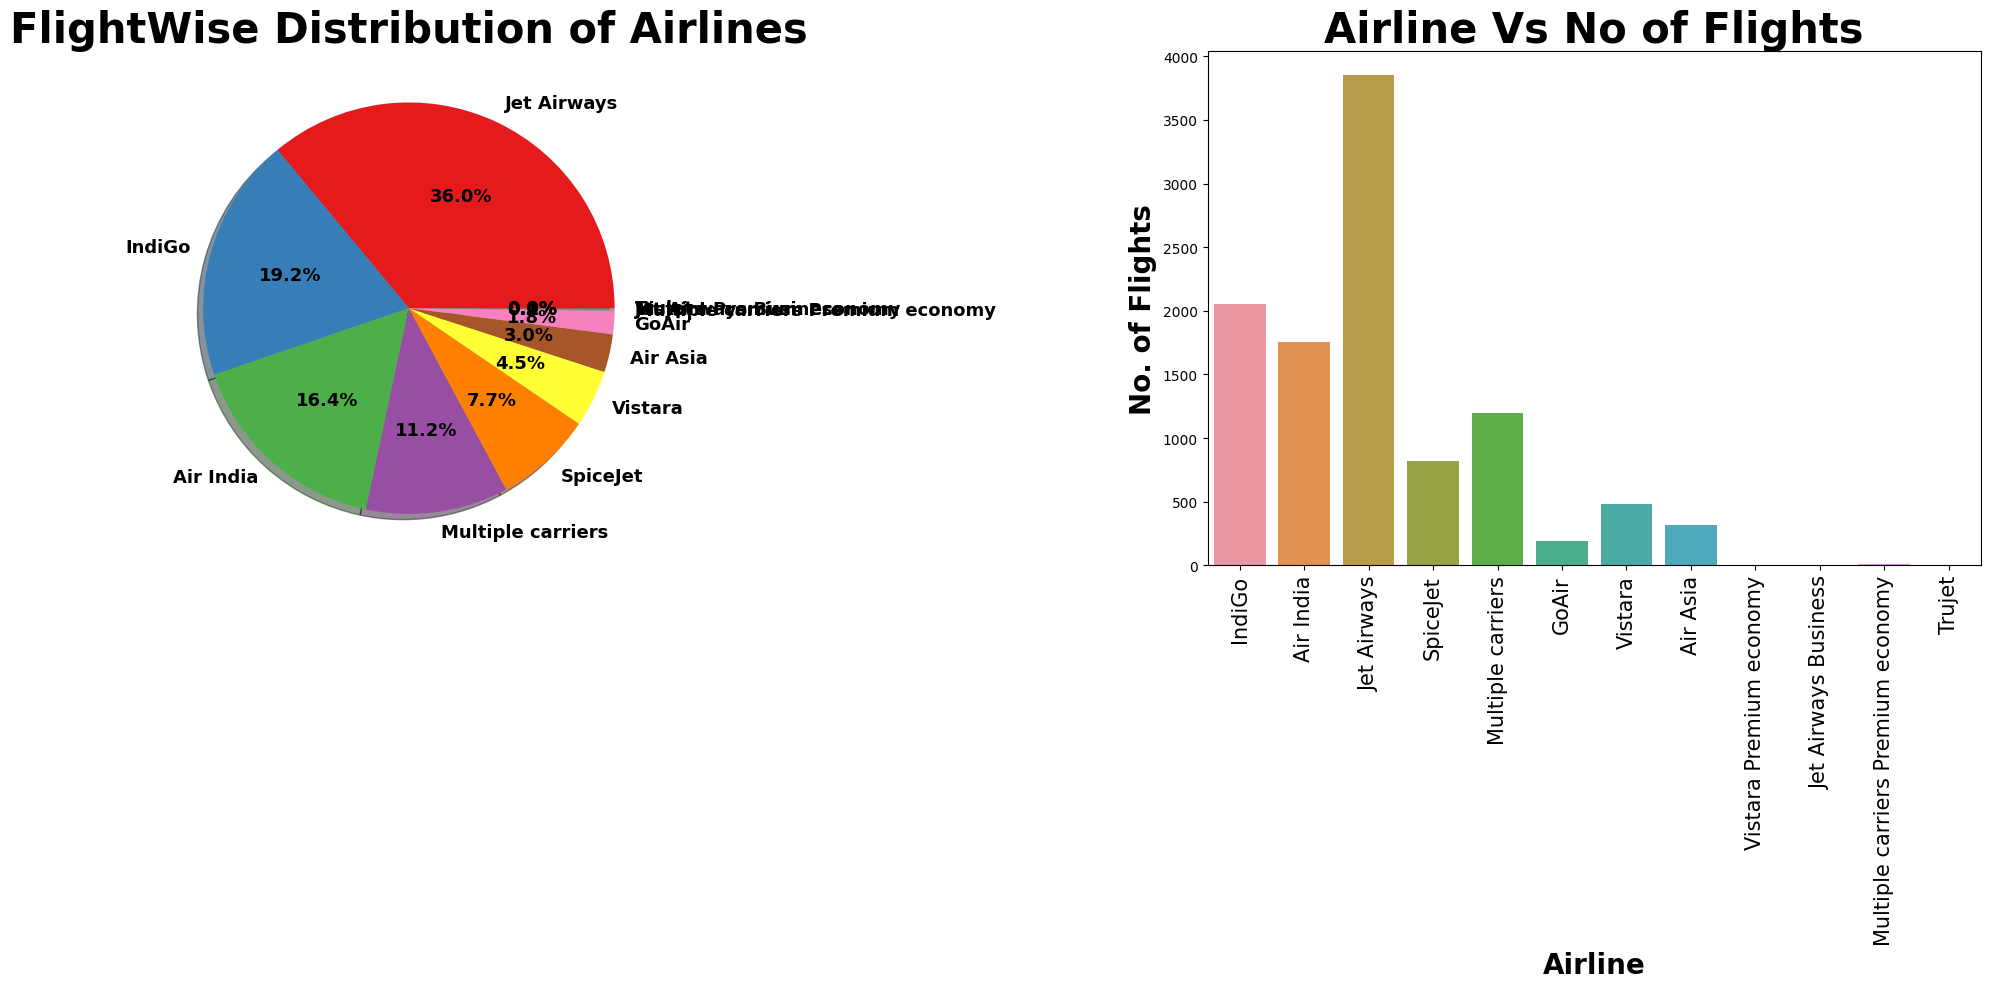

In [43]:
# Pie & count plot of Airline types
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(20,10))
data['Airline'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('FlightWise Distribution of Airlines', fontsize=30,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(data=data,x='Airline',ax=ax[1])
ax[1].set_title('Airline Vs No of Flights',fontsize=30,fontweight ='bold')
ax[1].set_xlabel("Airline",fontsize=20,fontweight ='bold')
ax[1].set_ylabel("No. of Flights",fontsize=20,fontweight ='bold')
plt.xticks(fontsize=15,rotation= 90)
plt.tight_layout()
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

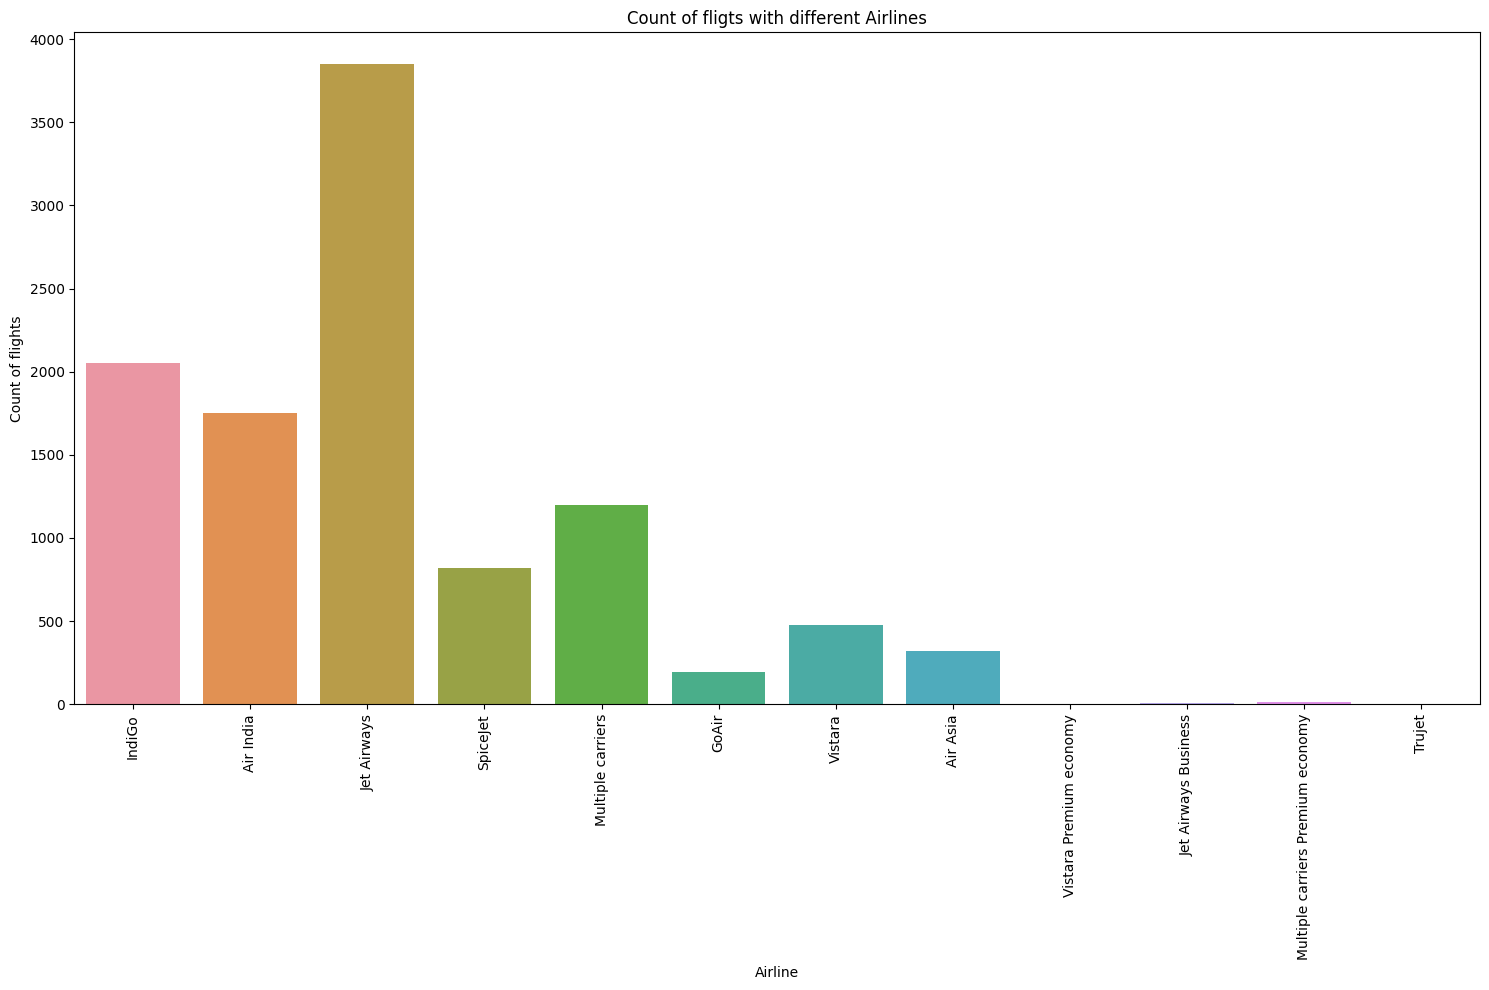

In [44]:
plt.figure(figsize=(15,10))
plt.title("Count of fligts with different Airlines")
ax=sns.countplot(x="Airline",data=data)
plt.xlabel('Airline')
plt.ylabel("Count of flights")
plt.xticks(rotation=90)

#### OBSERVATION 
     Jet airway has maxium Airplane

In [45]:
data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0         No info   3897              24                 3         22   
1         No info   7662               1                 5          5   
2         No info  13882               9                 6          9   
3         No info   6218              12                 5         18   
4         No info  13302               1                 3         16   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duration_minutes  
0          20             1              10               2                50  
1          50            13              15               7                25  
2          25             4              25              19                 0  
3           5            23              30               5                25  
4          50            21              35               4                45

In [46]:
### Airline is a normal categorical data we will do OneHotencoding

airline=data[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head(4)

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  
0               0                0                                0  
1               0                0                                0  
2               0                0                                0  
3               0                0                                0

## 2.Source

In [47]:
data['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [50]:
data.iplot(kind="box",x="Price",y="Source")

/Users/tariniprasaddas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



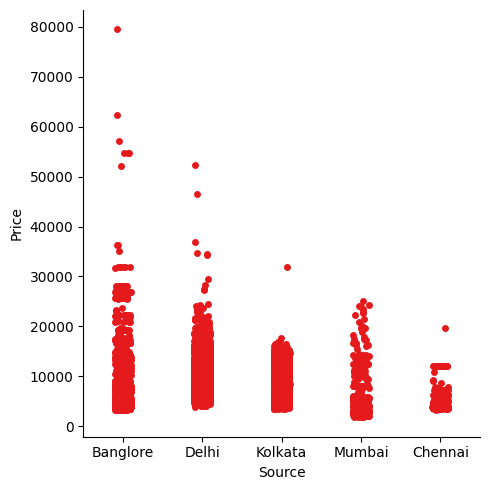

In [52]:
sns.catplot(data=data.sort_values("Price",ascending=False),x="Source",y="Price",)

/Users/tariniprasaddas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



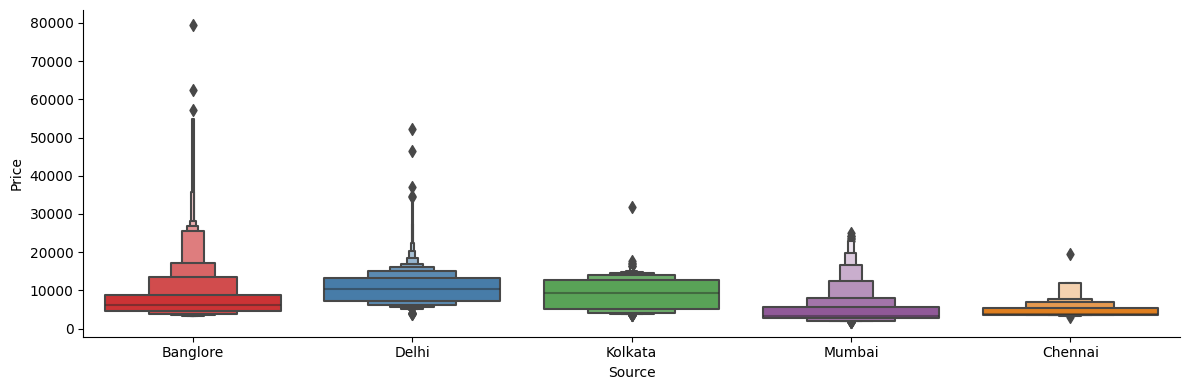

In [53]:
sns.catplot(y = "Price", x = "Source", data = data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [55]:
# as source Nominal Categorical data will performe Onehotencoding--

source=data[["Source"]]
source=pd.get_dummies(source,drop_first=True)
source.head(10)

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0
5               0             0               1              0
6               0             0               0              0
7               0             0               0              0
8               0             0               0              0
9               0             1               0              0

## 3.Destination

In [56]:
data['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

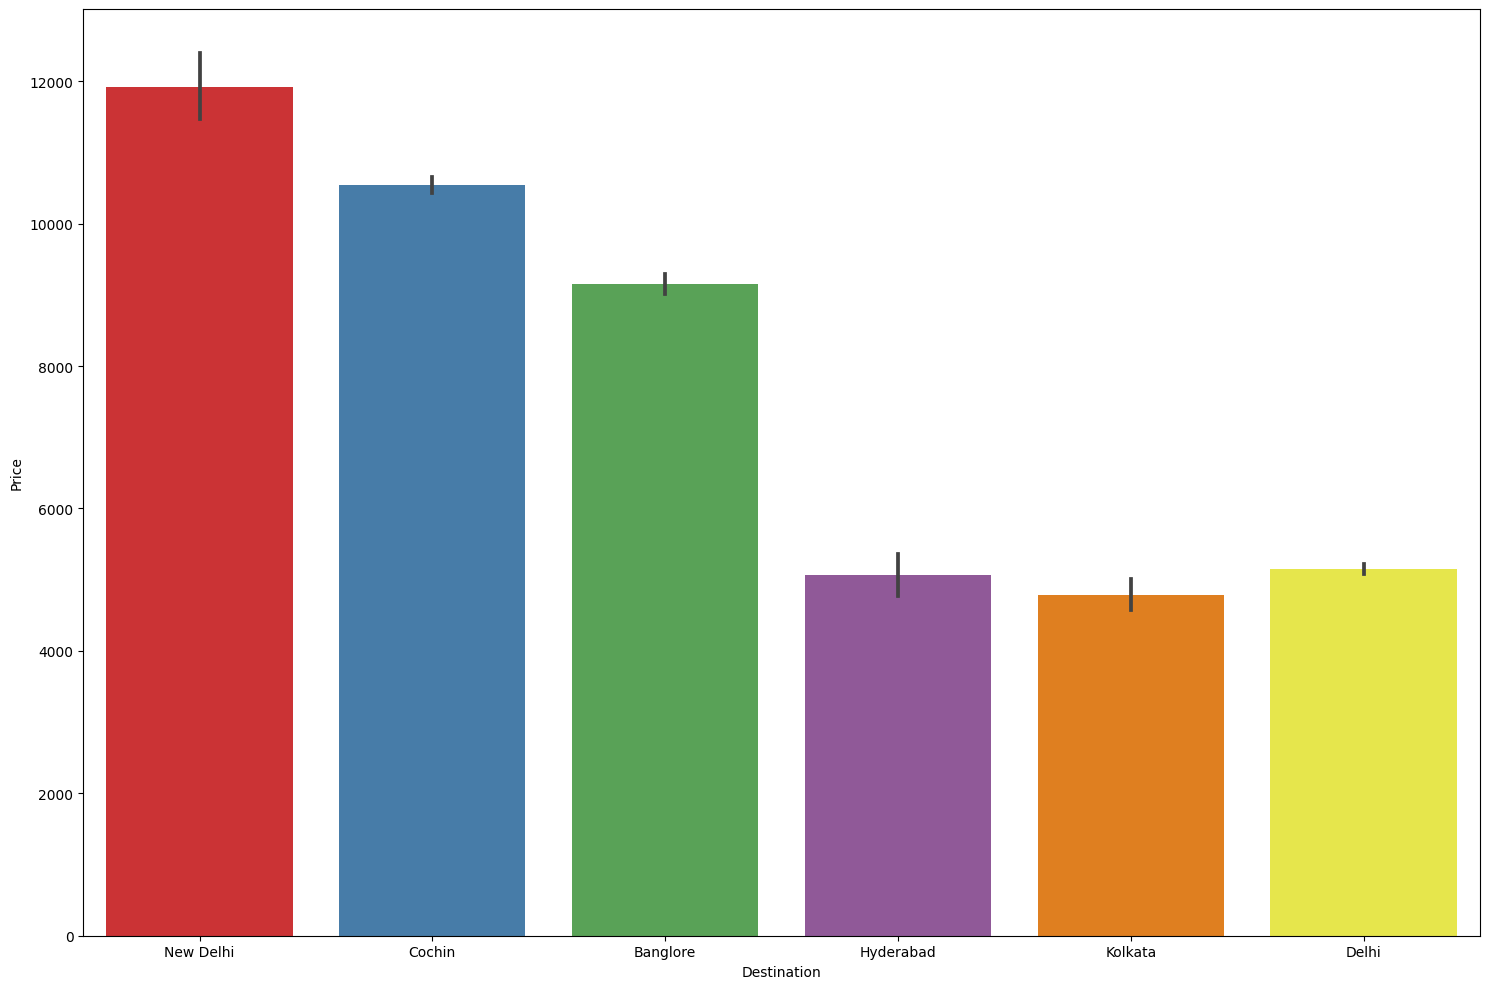

In [57]:
plt.figure(figsize=(15,10))
sns.barplot(x="Destination",y="Price",data=data.sort_values("Price",ascending=False))

/Users/tariniprasaddas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1600x1200 with 0 Axes>

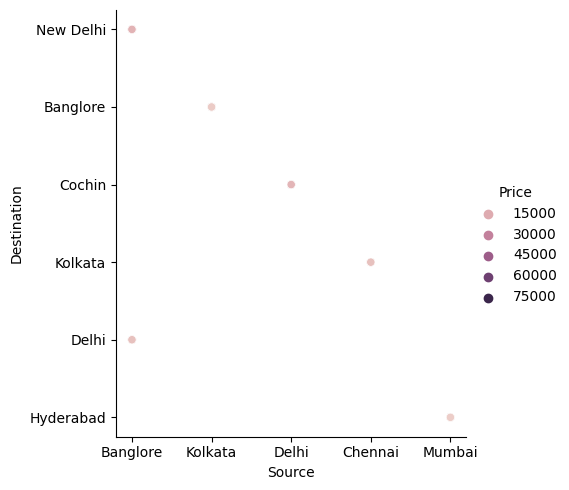

In [62]:
plt.figure(figsize=(16,12))
sns.relplot(x="Source",y="Destination",hue="Price",data=data)

In [60]:
# as destination is a Nominal Categorical data we will do OnehotEncoding

destination=data[["Destination"]]
destination=pd.get_dummies(destination,drop_first=True)
destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

Observation:

     1) The Highest Price is From Bangalore to New Delhi.
     2) The Lowest Price is From Mumbai to Hyderabad.

### 4.Duration Hours

<Axes: xlabel='Destination', ylabel='Duration_hours'>

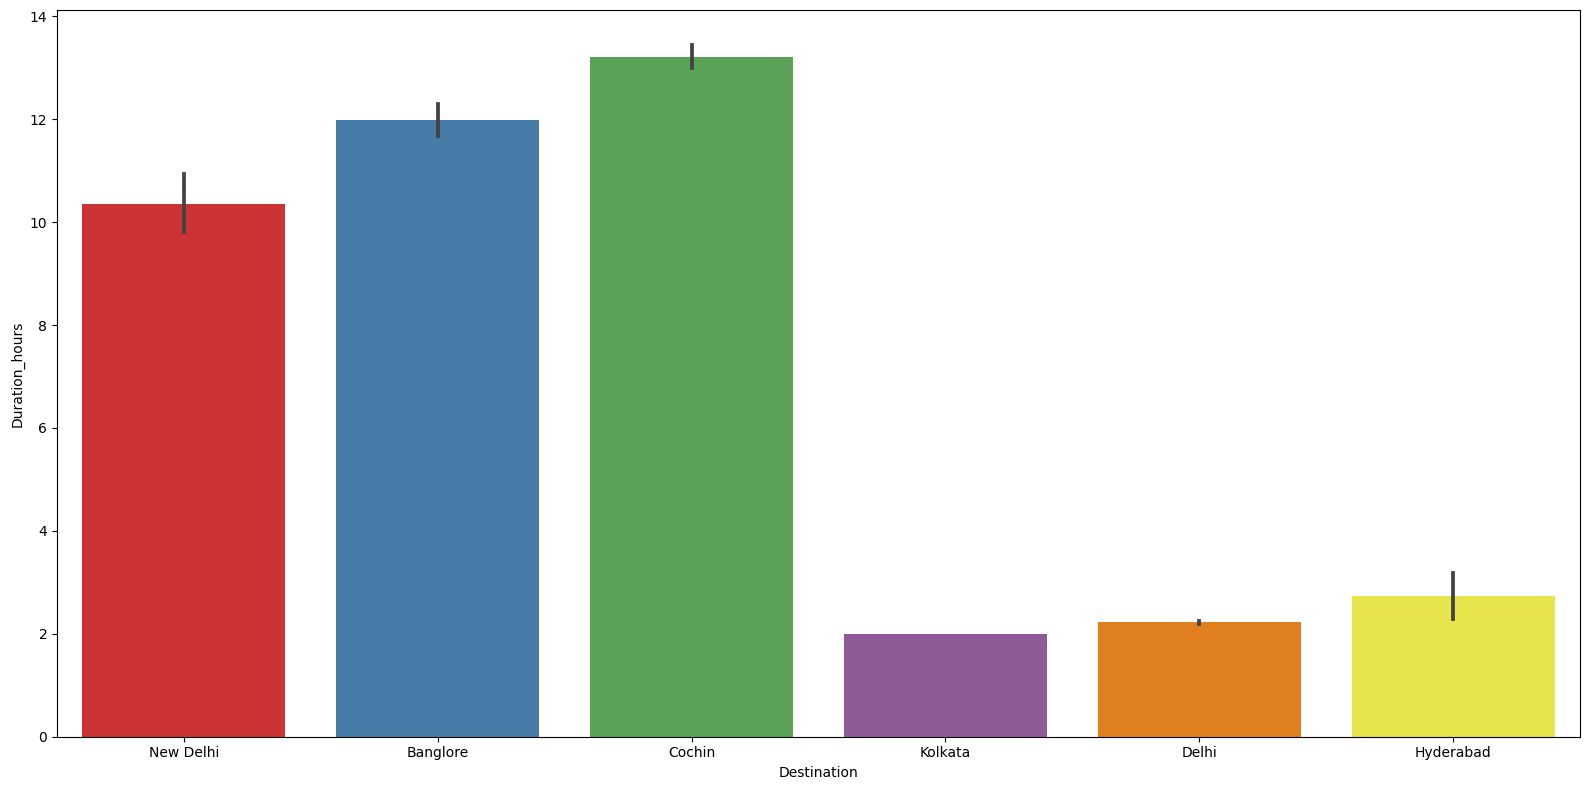

In [64]:
plt.figure(figsize=(16,8))
sns.barplot(x="Destination",y="Duration_hours",data=data)

/Users/tariniprasaddas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



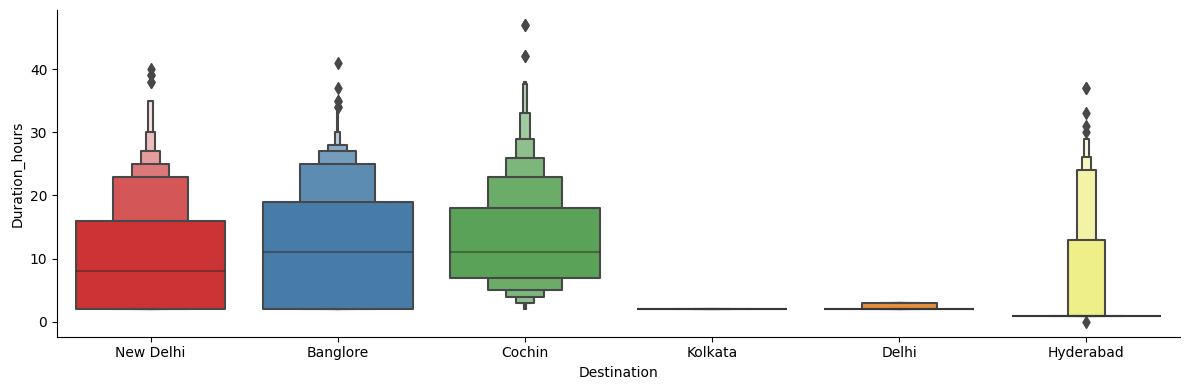

In [65]:
sns.catplot( x = "Destination",y = "Duration_hours", data = data, kind="boxen", height = 4, aspect = 3)
plt.show()

**Observation**
 1. Cochin is the destination which is taking highest no. of hours.

/Users/tariniprasaddas/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



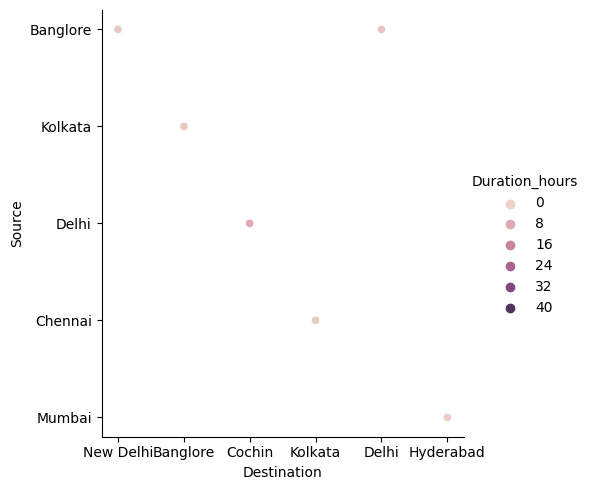

In [66]:
sns.relplot(x="Destination",y="Source",hue="Duration_hours",data=data)

**Observation**
  1. New Delhi to Banglore has the maxium duration hours of flight.
  2. Aftr that Banglore to kolkata
  3. Hyderabad to Mumbai has the least duration hours of flight.


### 5. Route and Additional Info

In [67]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10683, dtype: object

In [68]:
data['Additional_Info']

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10683, dtype: object

In [69]:
##dropping the Route and Additional columns..
data.drop(["Route","Additional_Info"],axis=1,inplace=True)

**observation of Route and Additional Info:**

     1) Additional Info has no information which would help us               so,drop it.
     2) Route has no use in here so, i have drop it.

## 6.Total Stops

In [70]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', 0.0, '4 stops'],
      dtype=object)

In [71]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
0.0            1
4 stops        1
Name: Total_Stops, dtype: int64

In [72]:
# As Total Stop is case of Ordinal Categorical type we perform LabelEncoder and
# Here Values are assigned with corresponding keys --
data["Total_Stops"].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [73]:
data['Total_Stops'].unique()

array([0., 2., 1., 3., 4.])

**Observation:**

    1) Total Stop is necessary so i am not droping it.
    
    2) Its is a Ordinal Categorical Data so i have done do            LabelEncoder so that model will understand easily.
    
**What to do now:-**

     1) We have done all necessary EDA.
     2) We have also done OneHotEncoding and LabelEncoding regarding Categorical Data.
     3) Now, we will concate all encodig data so that our model could understand easily.

## data_new = data+Airline+Source+Destination

In [74]:
## concatenate dataframe --> train_data + Airline + Source + Destination

data_new=pd.concat([data,airline,source,destination],axis=1)

In [75]:
data_new.head()

Airline    Source Destination  Total_Stops  Price  Day_of_Journey  \
0       IndiGo  Banglore   New Delhi          0.0   3897              24   
1    Air India   Kolkata    Banglore          2.0   7662               1   
2  Jet Airways     Delhi      Cochin          2.0  13882               9   
3       IndiGo   Kolkata    Banglore          1.0   6218              12   
4       IndiGo  Banglore   New Delhi          1.0  13302               1   

   Month_of_Journey  Dep_hours  Dep_minute  Arrival_hour  Arrival_minute  \
0                 3         22          20             1              10   
1                 5          5          50            13              15   
2                 6          9          25             4              25   
3                 5         18           5            23              30   
4                 3         16          50            21              35   

   Duration_hours  Duration_minutes  Airline_Air India  Airline_GoAir  \
0               2                50                  0              0   
1               7                25                  1              0   
2              19                 0                  0              0   
3               5                25                  0              0   
4               4                45                  0              0   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0               1                    0                             0   
1               0                    0                             0   
2               0                    1                             0   
3               1                    0                             0   
4               1                    0                             0   

   Airline_Multiple carriers  Airline_Multiple carriers Premium economy  \
0                          0                                          0   
1                          0                                          0   
2                          0                                          0   
3                          0                                          0   
4                          0                                          0   

   Airline_SpiceJet  Airline_Trujet  Airline_Vistara  \
0                 0               0                0   
1                 0               0                0   
2                 0               0                0   
3                 0               0                0   
4                 0               0                0   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                                0               0             0   
1                                0               0             0   
2                                0               0             1   
3                                0               0             0   
4                                0               0             0   

   Source_Kolkata  Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0               0              0                   0                  0   
1               1              0                   0                  0   
2               0              0                   1                  0   
3               1              0                   0                  0   
4               0              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1

In [76]:
data_new.shape

(10683, 33)

In [78]:
data_new.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [79]:
data_new.head()

Total_Stops  Price  Day_of_Journey  Month_of_Journey  Dep_hours  \
0          0.0   3897              24                 3         22   
1          2.0   7662               1                 5          5   
2          2.0  13882               9                 6          9   
3          1.0   6218              12                 5         18   
4          1.0  13302               1                 3         16   

   Dep_minute  Arrival_hour  Arrival_minute  Duration_hours  Duration_minutes  \
0          20             1              10               2                50   
1          50            13              15               7                25   
2          25             4              25              19                 0   
3           5            23              30               5                25   
4          50            21              35               4                45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

## FEATURE SELECTION

In [80]:
data_new.shape

(10683, 30)

In [81]:
data_new.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hours', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [82]:
x=data_new.loc[:,['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hours', 'Dep_minute', 'Arrival_hour', 'Arrival_minute',
       'Duration_hours', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [83]:
x.head()

Total_Stops  Day_of_Journey  Month_of_Journey  Dep_hours  Dep_minute  \
0          0.0              24                 3         22          20   
1          2.0               1                 5          5          50   
2          2.0               9                 6          9          25   
3          1.0              12                 5         18           5   
4          1.0               1                 3         16          50   

   Arrival_hour  Arrival_minute  Duration_hours  Duration_minutes  \
0             1              10               2                50   
1            13              15               7                25   
2             4              25              19                 0   
3            23              30               5                25   
4            21              35               4                45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Jet Airways Business  Airline_Multiple carriers  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   Airline_Multiple carriers Premium economy  Airline_SpiceJet  \
0                                          0                 0   
1                                          0                 0   
2                                          0                 0   
3                                          0                 0   
4                                          0                 0   

   Airline_Trujet  Airline_Vistara  Airline_Vistara Premium economy  \
0               0                0                                0   
1               0                0                                0   
2               0                0                                0   
3               0                0                                0   
4               0                0                                0   

   Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai  \
0               0             0               0              0   
1               0             0               1              0   
2               0             1               0              0   
3               0             0               1              0   
4               0             0               0              0   

   Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [84]:
y=data_new.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<Axes: >

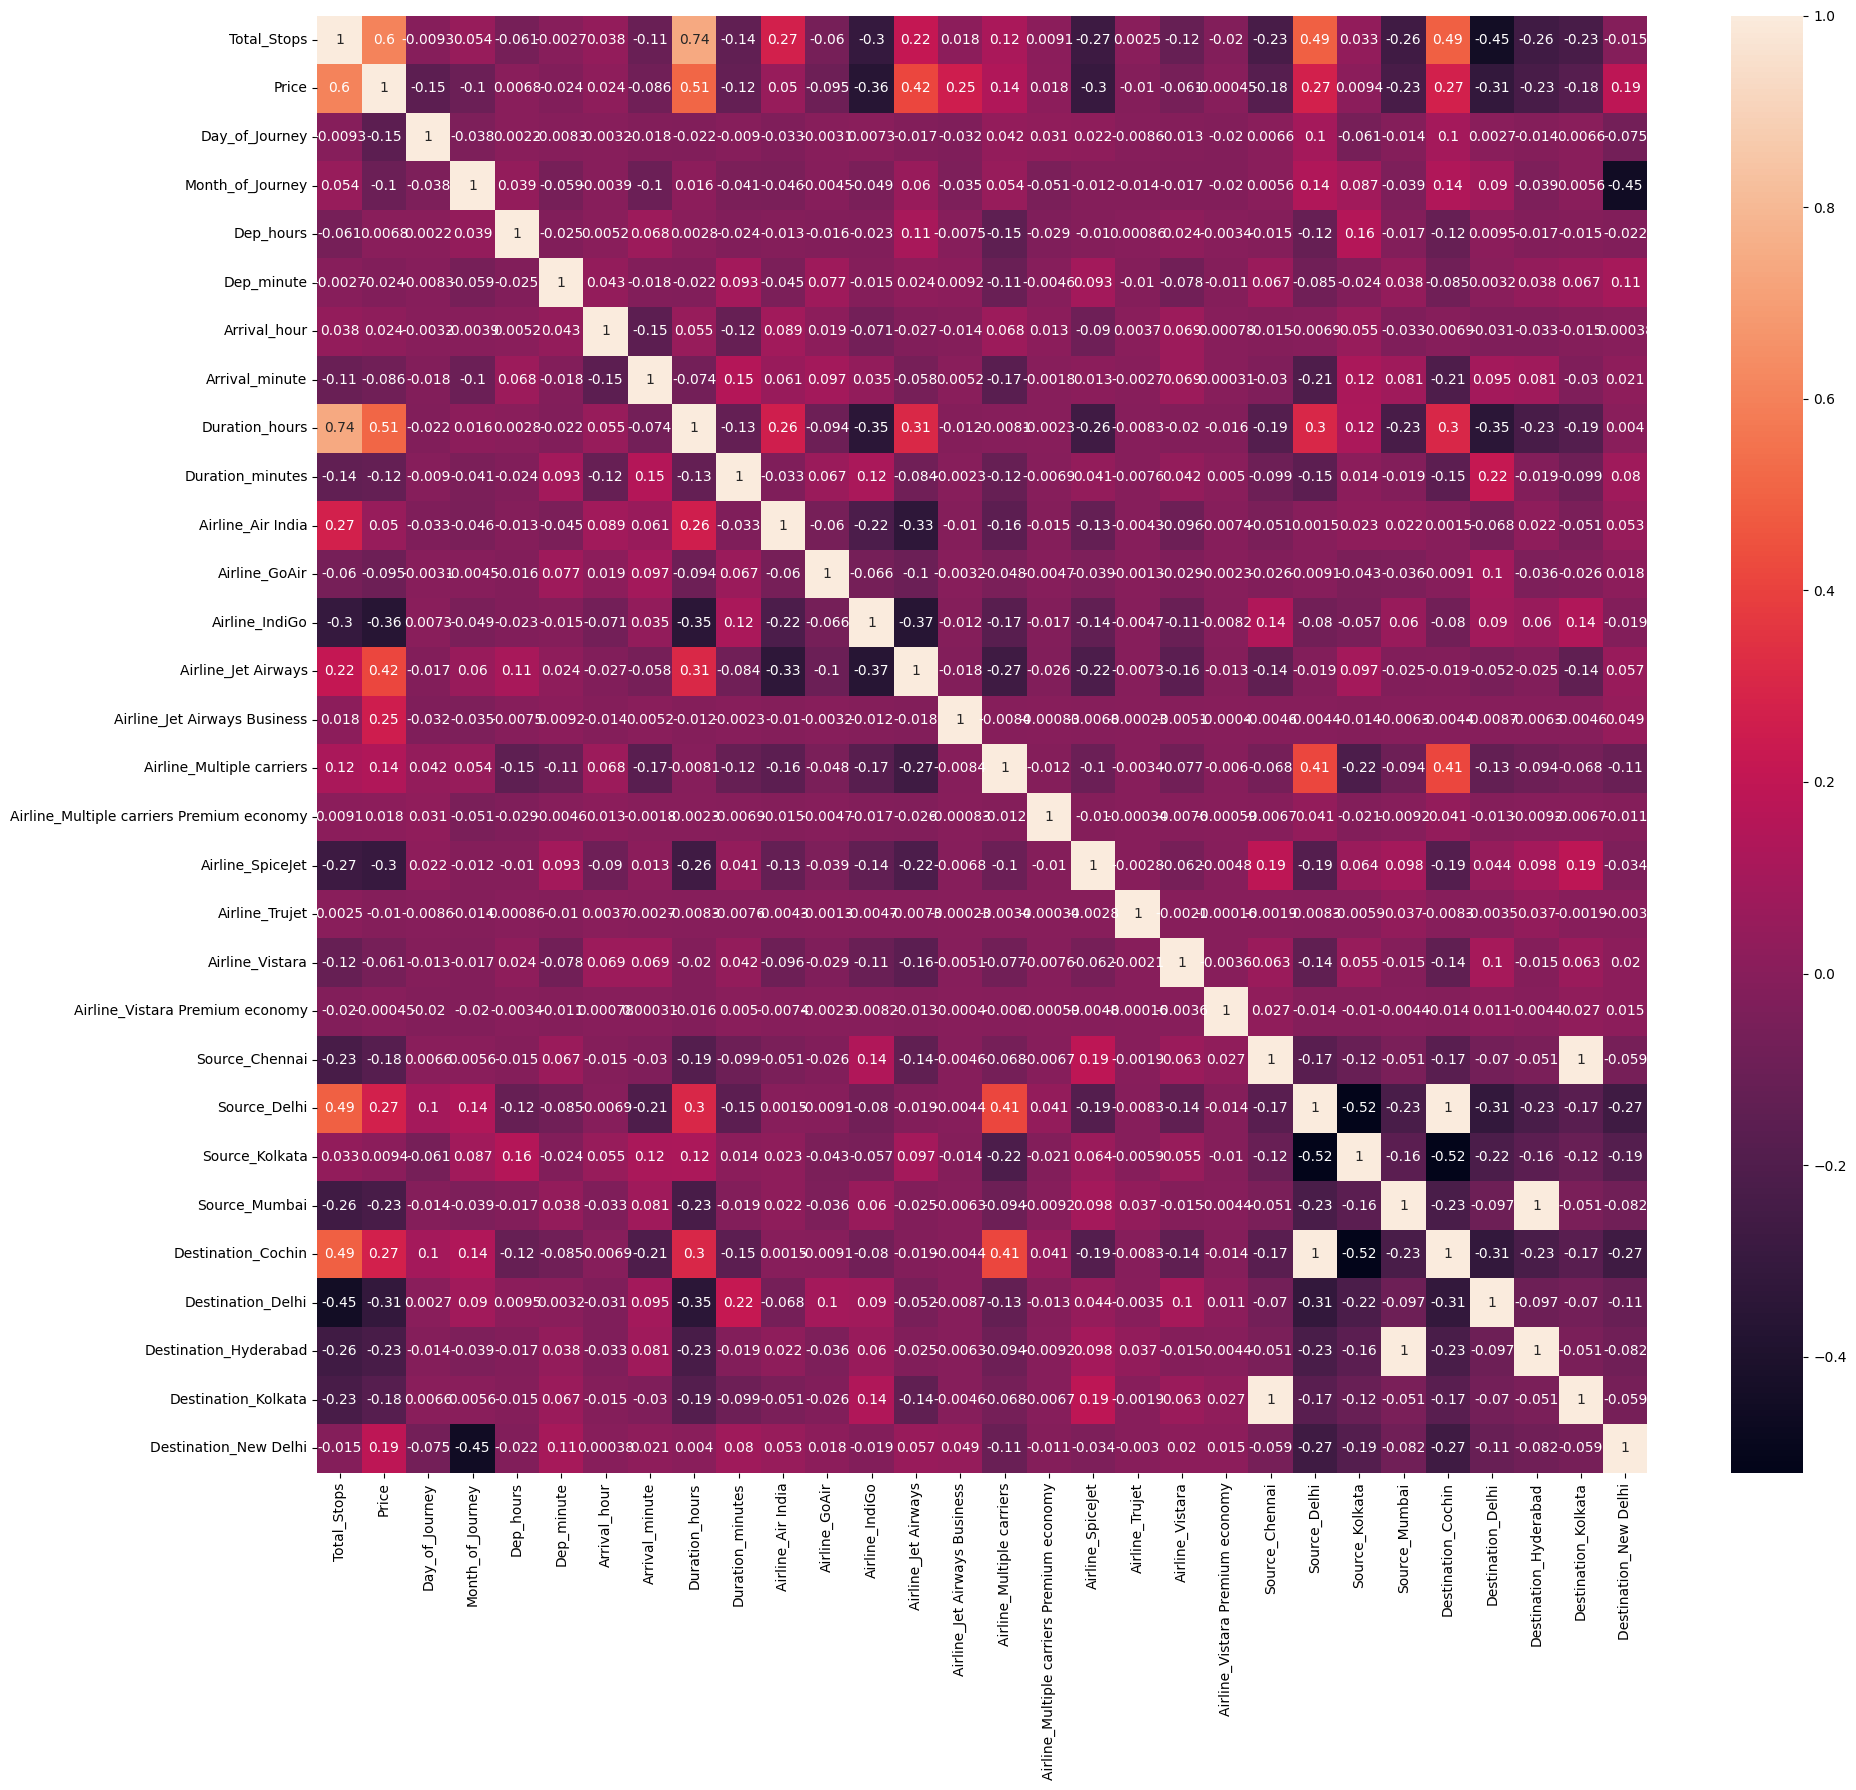

In [85]:
## correlation between independence and depedence variable in Encoding Dataset:
plt.figure(figsize=(20,18))
sns.heatmap(data_new.corr(),annot=True)

/var/folders/rs/w1cppzrd0tg10lz07q7q90qm0000gn/T/ipykernel_972/2039948332.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

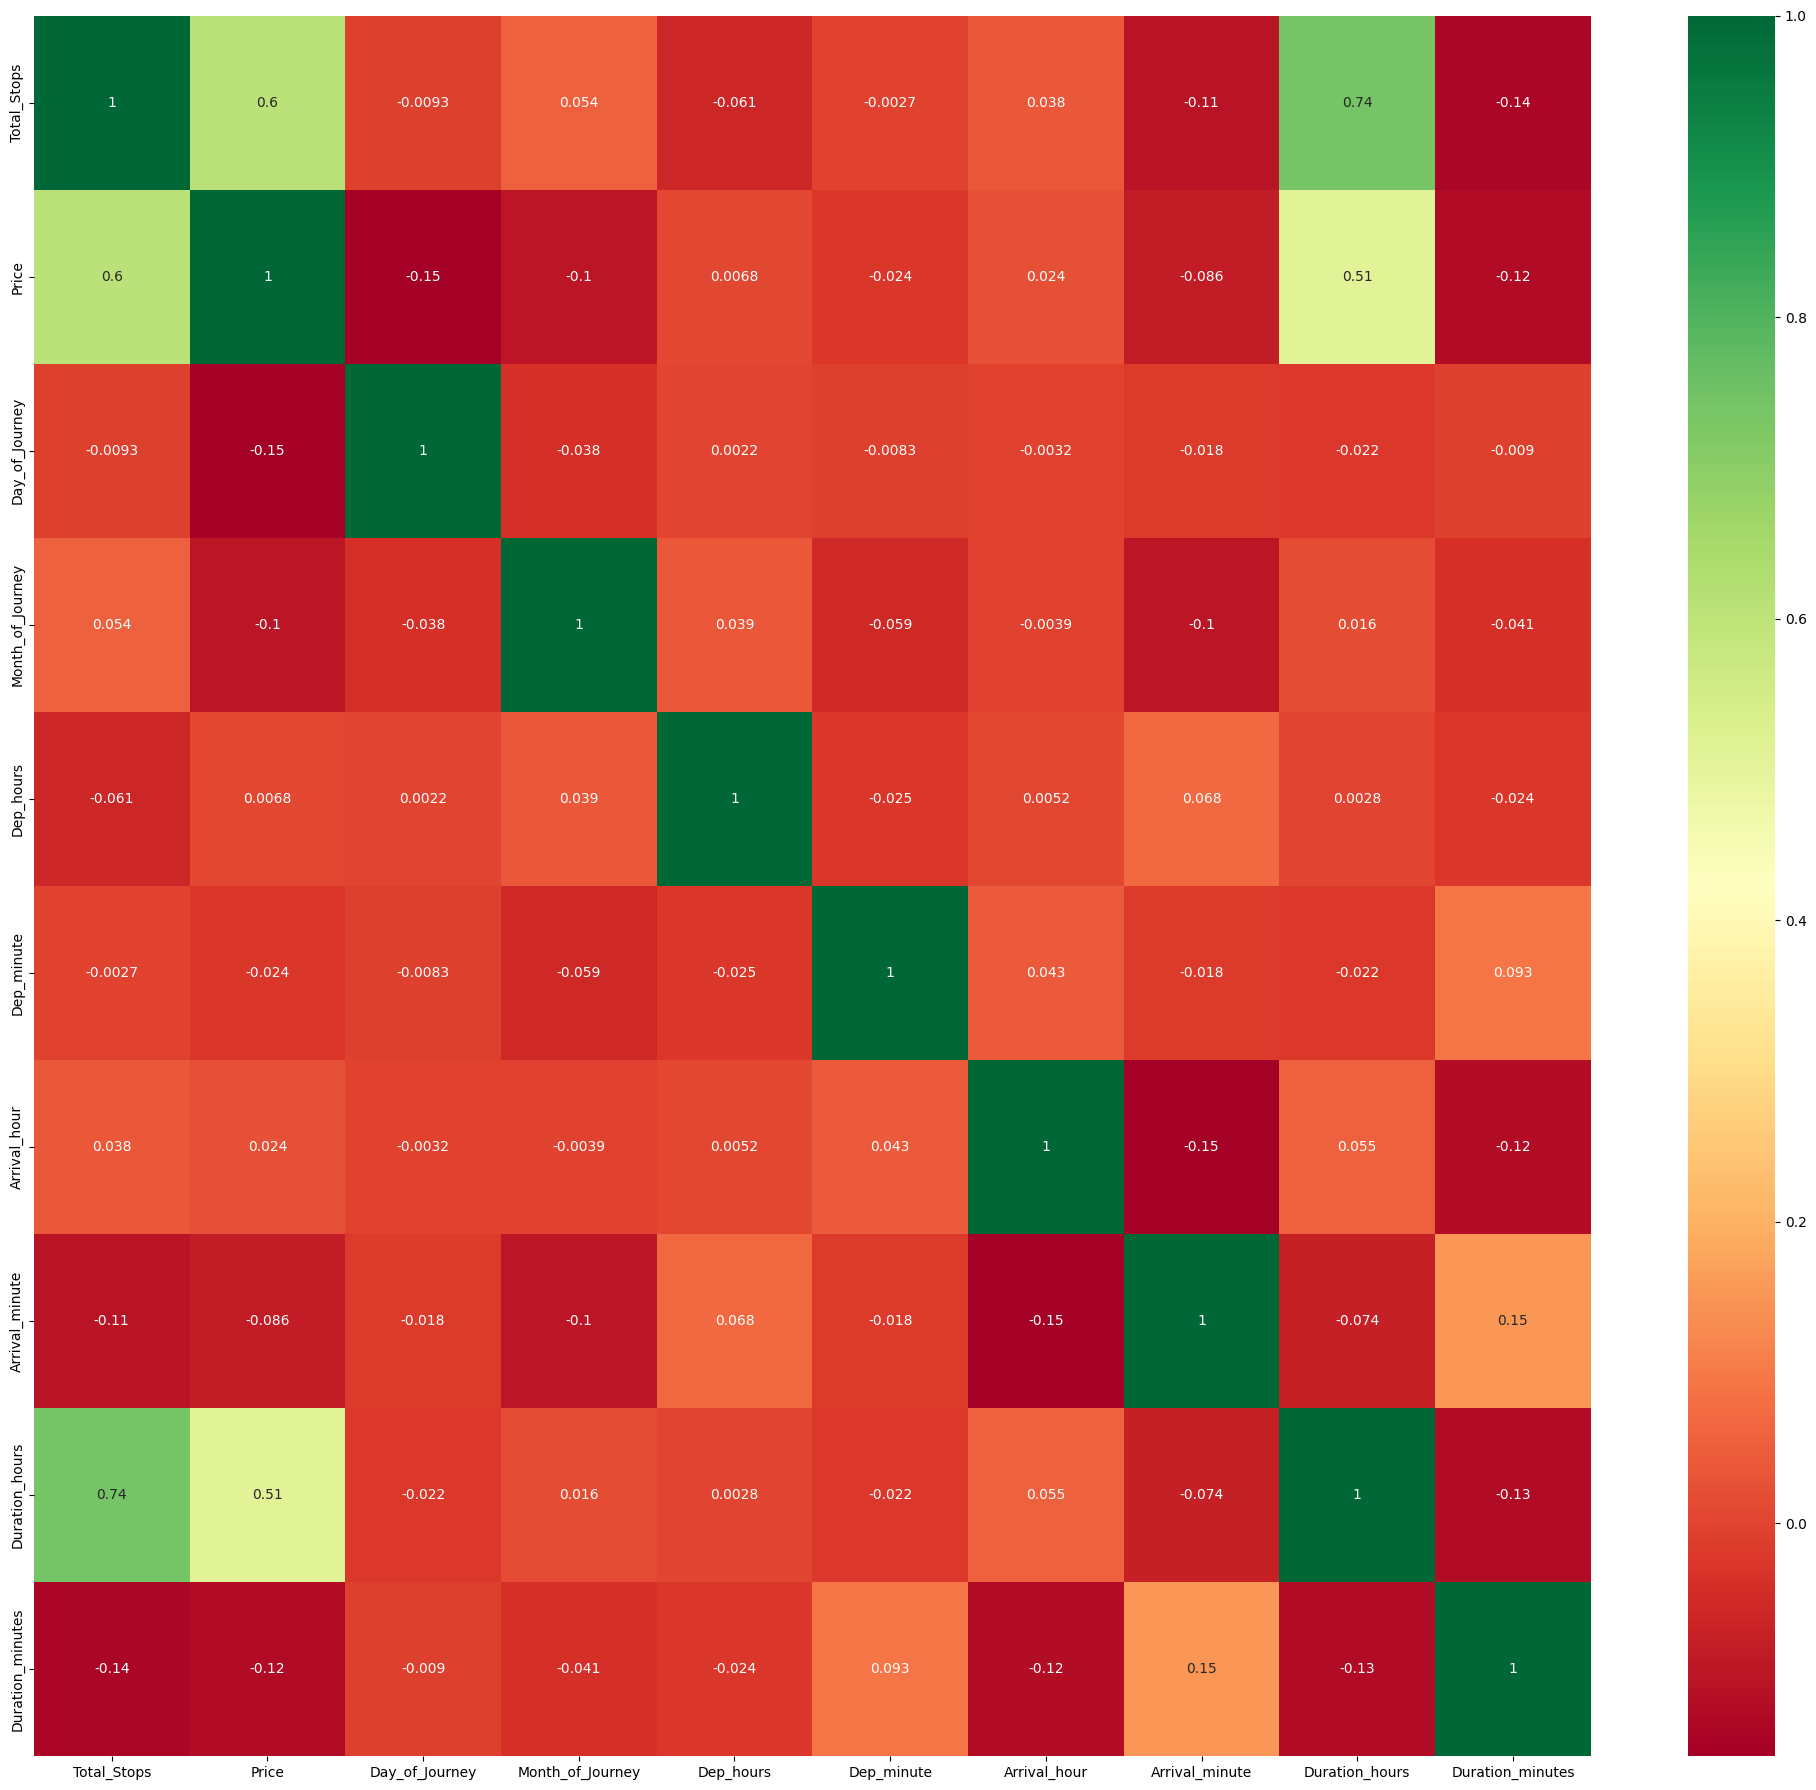

In [87]:
## correlation between independence and depedence variable in Encoding Dataset:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

**Observation:**


       we check correlation in both the dataset that is Encoded Dataset as well as in the Original Dataset and we find that there in such correlation among the indepence coulmns.